Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

## We chose the ARIMA model with order (2, 1, 0) since it had the minimum AIC score

In [2]:
# function to impute missing values using ARIMA 
def fill_missing_arima(data):
    missing_indices = np.where(data.isna())[0]
    
    # Predict missing values
    for i in missing_indices:
        
        # Fit ARIMA(2, 1, 0) upto the current value
        model = ARIMA(np.array(data.iloc[:i]), order=(2, 1, 0))
        model_fit = model.fit()
        
        # Forecast the next missing value and store it in the time series
        forecast = model_fit.forecast(steps=1)
        data[i] = forecast[0]
    
    return data

## Import the dataset

In [3]:
dataset = pd.read_csv("../apple_2023_masked.csv")

In [4]:
apple_data = dataset.copy()

## Being the forward and backward imputation process using the above function

In [5]:
daynumber = "1day"

# Apply the function in forward direction 
apple_data[daynumber+"_imputed"] = fill_missing_arima(apple_data[daynumber].copy())

# Apply the function in reverse direction 
apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(dataset[daynumber][::-1].copy().reset_index().drop(columns=["index"])[daynumber])
apple_data[daynumber+"_imputed_reversed"] = apple_data[daynumber+"_imputed_reversed"][::-1].reset_index().drop(columns=["index"])

# Store the average of the two imputations
apple_data[daynumber+"fbarima_average"] = (apple_data[daynumber+"_imputed_reversed"] + apple_data[daynumber+"_imputed"])/2
apple_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day,1day_imputed,1day_imputed_reversed,1dayfbarima_average
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426


### Repeat the process for other length of missing windows

In [6]:
daynumber = "2day"

# Apply the function in forward direction 
apple_data[daynumber+"_imputed"] = fill_missing_arima(apple_data[daynumber].copy())

# Apply the function in reverse direction 
apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(dataset[daynumber][::-1].copy().reset_index().drop(columns=["index"])[daynumber])
apple_data[daynumber+"_imputed_reversed"] = apple_data[daynumber+"_imputed_reversed"][::-1].reset_index().drop(columns=["index"])

# Store the average of the two imputations
apple_data[daynumber+"fbarima_average"] = (apple_data[daynumber+"_imputed_reversed"] + apple_data[daynumber+"_imputed"])/2



daynumber = "3day"

# Apply the function in forward direction 
apple_data[daynumber+"_imputed"] = fill_missing_arima(apple_data[daynumber].copy())

# Apply the function in reverse direction 
apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(dataset[daynumber][::-1].copy().reset_index().drop(columns=["index"])[daynumber])
apple_data[daynumber+"_imputed_reversed"] = apple_data[daynumber+"_imputed_reversed"][::-1].reset_index().drop(columns=["index"])

# Store the average of the two imputations
apple_data[daynumber+"fbarima_average"] = (apple_data[daynumber+"_imputed_reversed"] + apple_data[daynumber+"_imputed"])/2


daynumber = "4day"

# Apply the function in forward direction 
apple_data[daynumber+"_imputed"] = fill_missing_arima(apple_data[daynumber].copy())

# Apply the function in reverse direction 
apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(dataset[daynumber][::-1].copy().reset_index().drop(columns=["index"])[daynumber])
apple_data[daynumber+"_imputed_reversed"] = apple_data[daynumber+"_imputed_reversed"][::-1].reset_index().drop(columns=["index"])

# Store the average of the two imputations
apple_data[daynumber+"fbarima_average"] = (apple_data[daynumber+"_imputed_reversed"] + apple_data[daynumber+"_imputed"])/2


daynumber = "5day"

# Apply the function in forward direction 
apple_data[daynumber+"_imputed"] = fill_missing_arima(apple_data[daynumber].copy())

# Apply the function in reverse direction 
apple_data[daynumber+"_imputed_reversed"] = fill_missing_arima(dataset[daynumber][::-1].copy().reset_index().drop(columns=["index"])[daynumber])
apple_data[daynumber+"_imputed_reversed"] = apple_data[daynumber+"_imputed_reversed"][::-1].reset_index().drop(columns=["index"])

# Store the average of the two imputations
apple_data[daynumber+"fbarima_average"] = (apple_data[daynumber+"_imputed_reversed"] + apple_data[daynumber+"_imputed"])/2
apple_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,...,2dayfbarima_average,3day_imputed,3day_imputed_reversed,3dayfbarima_average,4day_imputed,4day_imputed_reversed,4dayfbarima_average,5day_imputed,5day_imputed_reversed,5dayfbarima_average
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,...,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,...,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,...,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,...,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,...,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,...,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,...,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,...,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,...,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426,193.071426


## Look at the plots

<Axes: >

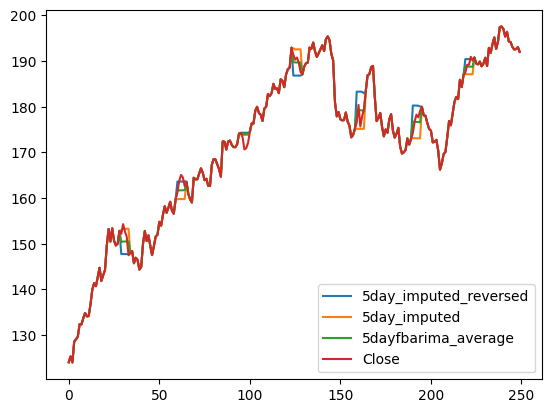

In [7]:
apple_data[["5day_imputed_reversed", "5day_imputed", "5dayfbarima_average", "Close"]].plot()

<Axes: >

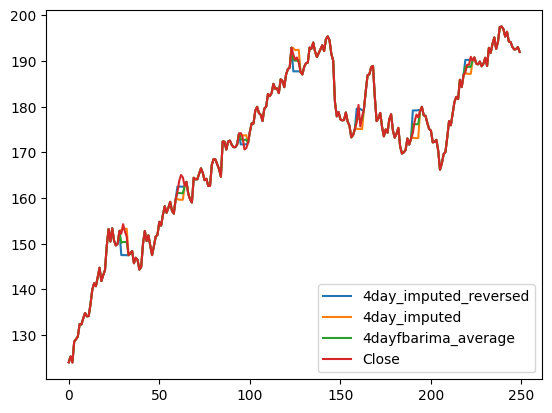

In [8]:
apple_data[["4day_imputed_reversed", "4day_imputed", "4dayfbarima_average", "Close"]].plot()

<Axes: >

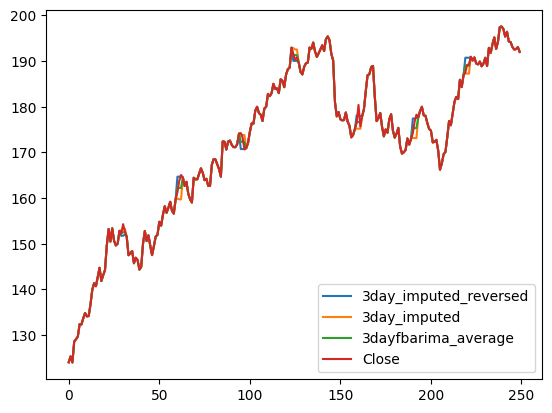

In [9]:
apple_data[["3day_imputed_reversed", "3day_imputed", "3dayfbarima_average", "Close"]].plot()

<Axes: >

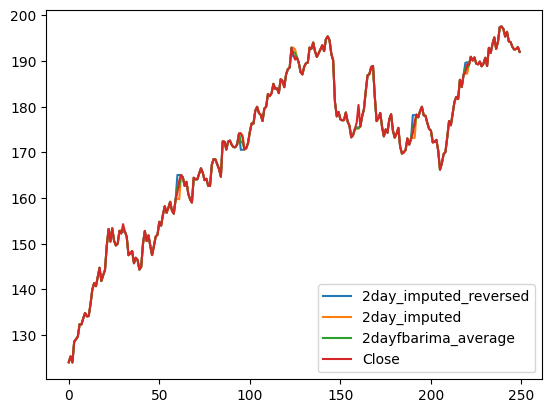

In [10]:
apple_data[["2day_imputed_reversed", "2day_imputed", "2dayfbarima_average", "Close"]].plot()

<Axes: >

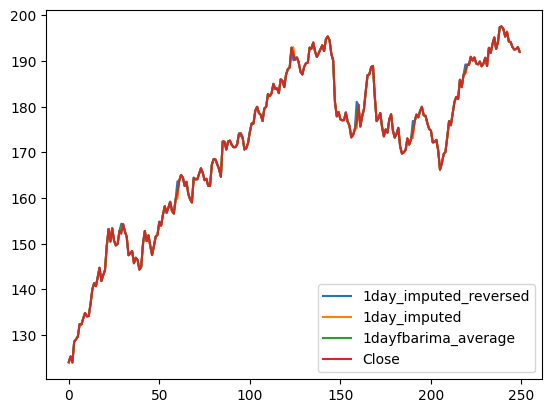

In [11]:
apple_data[["1day_imputed_reversed", "1day_imputed", "1dayfbarima_average", "Close"]].plot()

## Computing MSEs and comparing to Linear Interpolation

In [20]:
daynumber = '1day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print("linear interpolation MSE:", mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(daynumber+" MSE:",mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

linear interpolation MSE: 0.679228361280242
1day MSE: 0.9152634246800739


In [19]:
daynumber = '2day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print("linear interpolation MSE:", mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(daynumber+" MSE:",mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

linear interpolation MSE: 2.5263174677171785
2day MSE: 3.2205527117102535


In [18]:
daynumber = '3day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print("linear interpolation MSE:", mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(daynumber+" MSE:",mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

linear interpolation MSE: 1.8751985815220782
3day MSE: 2.4955888146036136


In [17]:
daynumber = '4day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print("linear interpolation MSE:", mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(daynumber+" MSE:",mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

linear interpolation MSE: 3.398599024755626
4day MSE: 3.716943390325388


In [16]:
daynumber = '5day'
missing_len = len(apple_data[apple_data[daynumber].isna()])
print("linear interpolation MSE:", mean_squared_error(apple_data[daynumber].interpolate(method="linear"), apple_data["Close"]) * len(apple_data)/missing_len)
print(daynumber+" MSE:",mean_squared_error(apple_data[daynumber+"fbarima_average"], apple_data["Close"])* len(apple_data)/missing_len)

linear interpolation MSE: 3.4755440464642504
5day MSE: 4.007862916544621


Linear interpolation MSE values are always lower than the MSE of averaged forward and backward ARIMA forcasting